In [ ]:
! pip install plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

In [ ]:
df=pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [ ]:
df.rename(columns={'Date':'date',
                    'Province/State':'state',
                   'Country/Region':'Country',
                   'Lat':'late',
                   'Long':'long',
                   'Confirmed':'confirmed',
                   'Deaths':'deaths',
                   'Recovered':'recovered'},
          inplace=True)

In [ ]:
df.head()

,state,Country,late,long,date,confirmed,deaths,recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [ ]:
df['active']=df['confirmed']-df['deaths']-df['recovered']

In [ ]:
df.head()

,state,country,late,long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0


In [ ]:
df.tail()

,state,country,late,long,date,confirmed,deaths,recovered,active
19215,NaN,Jersey,49.1900,-2.110,2020-03-23,0.0,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.500,2020-03-23,0.0,1.0,0.0,-1.0
19217,NaN,Republic of the Congo,-1.4400,15.556,2020-03-23,0.0,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.000,2020-03-23,0.0,0.0,0.0,0.0
19219,NaN,The Gambia,13.4667,-16.600,2020-03-23,0.0,0.0,0.0,0.0


In [ ]:
top=df[df['date']==df['date'].max()]

In [ ]:
top.head()

,state,country,late,long,date,confirmed,deaths,recovered,active
18910,NaN,Thailand,15.0000,101.0000,2020-03-23,599.0,1.0,44.0,554.0
18911,NaN,Japan,36.0000,138.0000,2020-03-23,1086.0,40.0,235.0,811.0
18912,NaN,Singapore,1.2833,103.8333,2020-03-23,455.0,2.0,144.0,309.0
18913,NaN,Nepal,28.1667,84.2500,2020-03-23,2.0,0.0,1.0,1.0
18914,NaN,Malaysia,2.5000,112.5000,2020-03-23,1306.0,10.0,139.0,1157.0


In [ ]:
world=top.groupby('country')['confirmed','active','deaths'].sum().reset_index()

In [ ]:
world.head()

,country,confirmed,active,deaths
0,Afghanistan,40.0,38.0,1.0
1,Albania,89.0,85.0,2.0
2,Algeria,201.0,119.0,17.0
3,Andorra,113.0,111.0,1.0
4,Angola,2.0,2.0,0.0


In [ ]:
figure=px.choropleth(world,locations='country',
                     locationmode='country names',color='active',
                     hover_name='country',range_color=[1,1000],
                     color_continuous_scale='reds',
                     title='countries with active cases')
figure.show()

In [ ]:
total_cases=df.groupby('date')['date','confirmed'].sum().reset_index()

In [ ]:
total_cases.head()

,date,confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


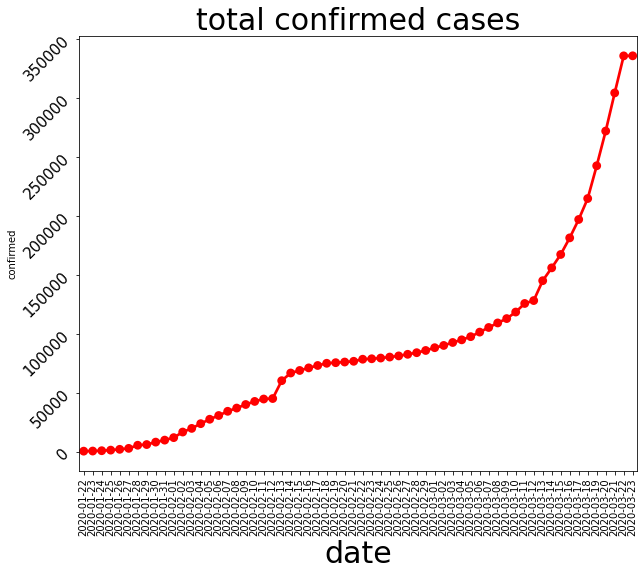

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=45,fontsize=15)
plt.xlabel('dates',fontsize=30)
plt.ylabel('confirmed cases')
plt.title('total confirmed cases',fontsize=30)
ax=sns.pointplot(x=total_cases.date.dt.date,y=total_cases.confirmed,color='r')

In [ ]:
top_active=top.groupby('country')['active'].sum().sort_values(ascending=False).head(20).reset_index()

In [ ]:
top_active

,country,active
0,Italy,46638.0
1,US,32681.0
2,Germany,24513.0
3,Spain,24421.0
4,France,13170.0
5,Iran,12022.0
6,Switzerland,7016.0
7,South Korea,5884.0
8,United Kingdom,5392.0
9,China,5351.0


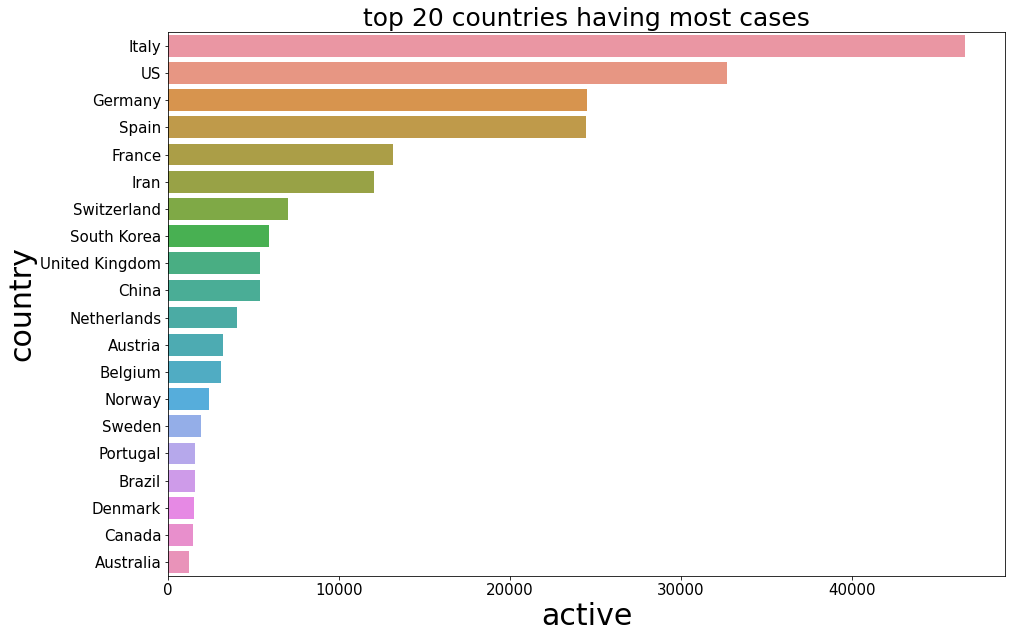

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('totalcases',fontsize=30)
plt.ylabel('country',fontsize=30)
plt.title('top 20 countries having most cases',fontsize=25)
ax=sns.barplot(x=top_active.active,y=top_active.country)

In [ ]:

italy=df[df.country=='Italy']
italy=italy.groupby('date')['recovered','deaths','confirmed','active'].sum().reset_index()


In [ ]:
italy.head(20)


,date,recovered,deaths,confirmed,active
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0
5,2020-01-27,0.0,0.0,0.0,0.0
6,2020-01-28,0.0,0.0,0.0,0.0
7,2020-01-29,0.0,0.0,0.0,0.0
8,2020-01-30,0.0,0.0,0.0,0.0
9,2020-01-31,0.0,0.0,2.0,2.0


In [ ]:
italy=italy.iloc[9:].reset_index().drop('index',axis=1)

In [ ]:
italy.head()

,date,recovered,deaths,confirmed,active
0,2020-01-31,0.0,0.0,2.0,2.0
1,2020-02-01,0.0,0.0,2.0,2.0
2,2020-02-02,0.0,0.0,2.0,2.0
3,2020-02-03,0.0,0.0,2.0,2.0
4,2020-02-04,0.0,0.0,2.0,2.0
